In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time

In [57]:
results_lst = os.listdir("percomb_runs")

In [72]:
df = pd.read_csv("percomb_runs/" + results_lst[0])
df = df.drop('Unnamed: 0',axis=1)

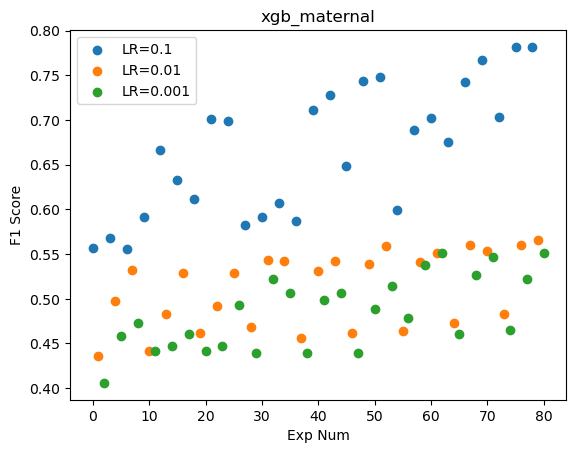

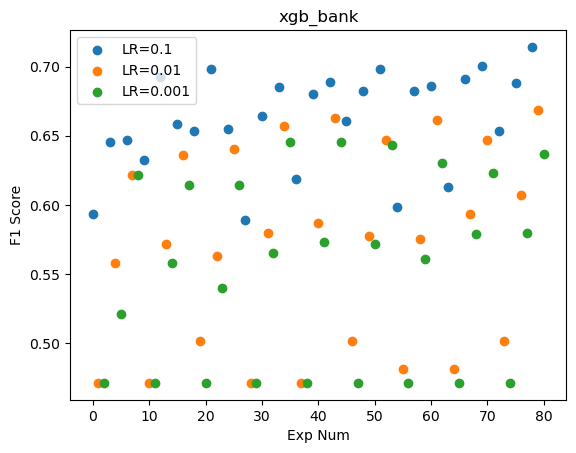

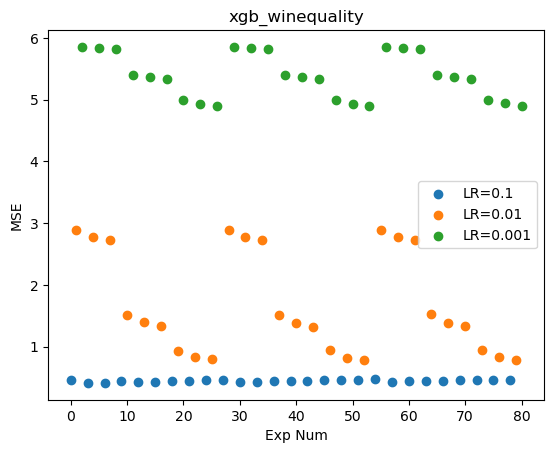

In [123]:
# scatter plot of exp results, where experiments are color coded based on the learning rate
# disregard the colsample by tree name; it's because the column names were swapped when file was generated
# confirms that LR = 0.1 
for i in range(len(results_lst)):
    filename = results_lst[i]
    if 'winequality' in filename:
        metric = 'MSE'
    else:
        metric = 'F1 Score'
    
    if 'xgb' in filename:
        df = pd.read_csv("percomb_runs/" + filename)
        df = df.drop('Unnamed: 0',axis=1)
        plt.scatter(df[df["Colsample By Tree"] == 0.1]['Num'], df[df["Colsample By Tree"] == 0.1][metric], label='LR=0.1')
        plt.scatter(df[df["Colsample By Tree"] == 0.01]['Num'], df[df["Colsample By Tree"] == 0.01][metric], label='LR=0.01')
        plt.scatter(df[df["Colsample By Tree"] == 0.001]['Num'], df[df["Colsample By Tree"] == 0.001][metric], label='LR=0.001')
        plt.xlabel("Exp Num")
        plt.ylabel(metric)
        plt.title(filename[17:-4])
        plt.legend()
        plt.show()
        time.sleep(1)
        

In [124]:
results_lst

['combined_results_xgb_maternal.csv',
 'combined_results_rf_winequality.csv',
 'combined_results_rf_bank.csv',
 'combined_results_xgb_bank.csv',
 'combined_results_xgb_winequality.csv',
 'combined_results_rf_maternal.csv']

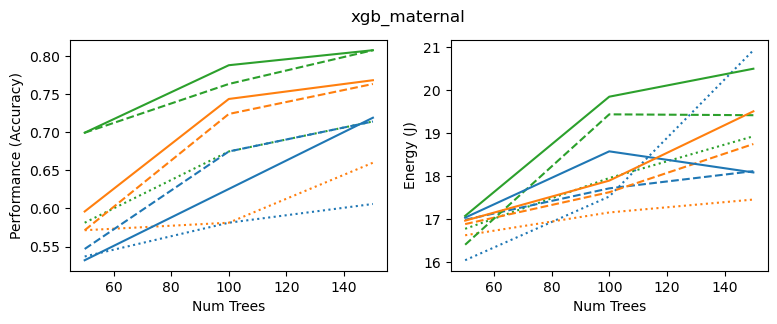

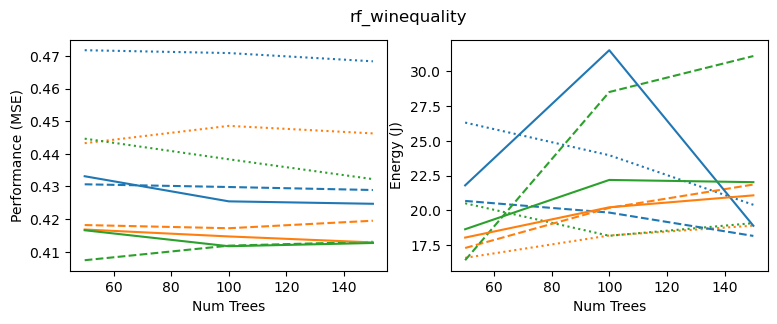

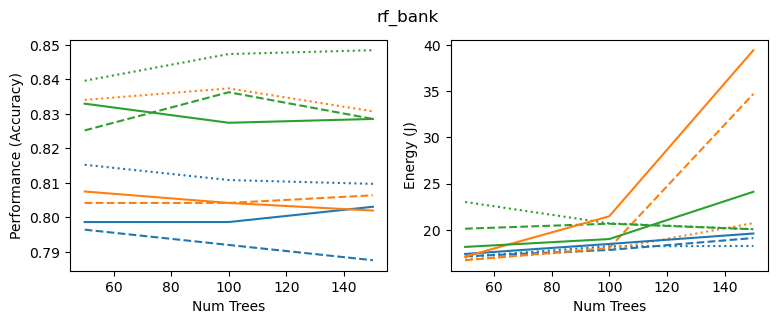

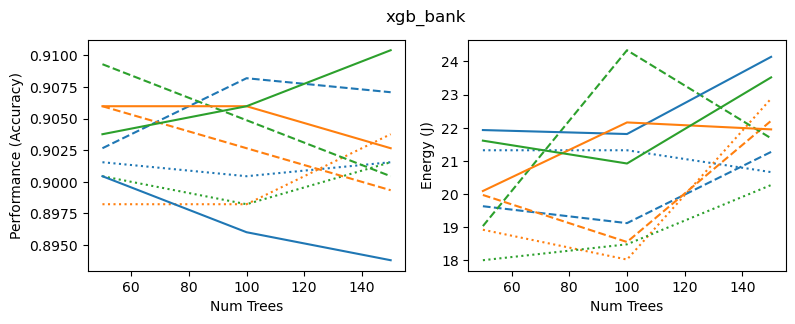

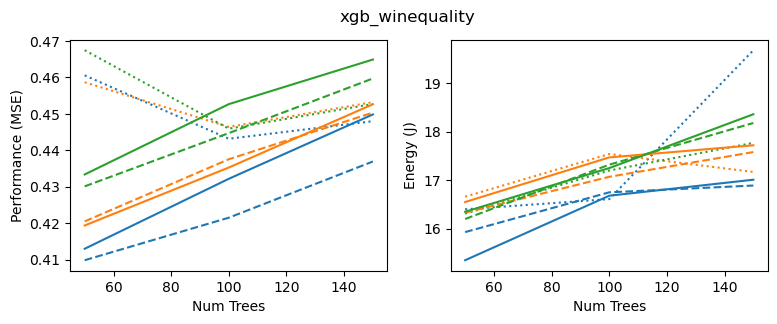

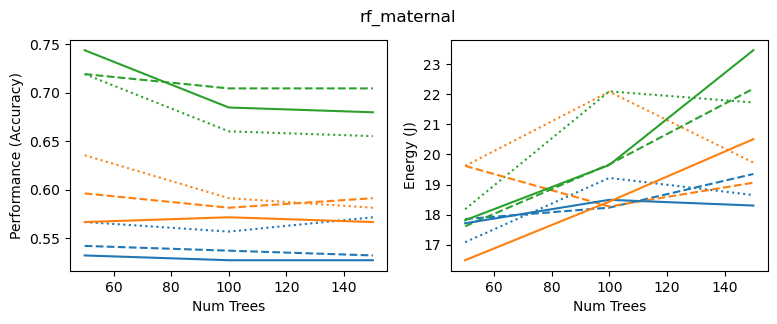

In [125]:
for i in range(len(results_lst)):
    filename = results_lst[i]
    if 'xgb' in filename:
        model = 'xgb'
        max_features_name = "Learning Rate"
    else:
        model = 'rf'
        max_features_name = "Max Features"
    if 'winequality' in filename:
        metric = 'MSE'
    else:
        metric = 'Accuracy'
    df = pd.read_csv("percomb_runs/" + filename)
    df = df.drop('Unnamed: 0',axis=1)
    
    fig, ax = plt.subplots(1, 2, figsize=(9, 3))
    
    colors = {3: "tab:blue", 4: "tab:orange", 5: "tab:green"}
    linestyles = {0.2: "dotted", 0.5: "dashed", 0.8: "solid"}
    markers = {0.2: "o", 0.5: "d", 0.8: ">"}
    
    
    
    for max_features in [0.2, 0.5, 0.8]:
        for max_depth in [3, 4, 5]:
            energy_results = []
            performance_results = []
            for n_estimators in [50, 100, 150]:
                hp_bool = (df[max_features_name] == max_features) & (df["Max Depth"] == max_depth) 
                if model == "xgb":
                    hp_bool = (hp_bool & (df['Colsample By Tree']==0.1) & (df["N_estimators"] == n_estimators))
                else:
                    hp_bool = (hp_bool &(df["n_estimators"] == n_estimators))
                energy_results.append(df[hp_bool]['Energy (J)'])
                performance_results.append(df[hp_bool][metric])
            ax[0].plot([50, 100, 150], performance_results, color=colors[max_depth], linestyle=linestyles[max_features])
            ax[0].set_xlabel("Num Trees")
            ax[0].set_ylabel("Performance ({0})".format(metric))
            
            ax[1].plot([50, 100, 150], energy_results, color=colors[max_depth], linestyle=linestyles[max_features])
            ax[1].set_xlabel("Num Trees")
            ax[1].set_ylabel("Energy (J)")
            
            fig.suptitle(filename[17:-4])
    plt.show()